# Data Analysis and ML using PySpark

**Installing required libraries and modules**

In [ ]:
!pip install wget
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.0/spark-2.4.0-bin-hadoop2.7.tgz
!tar xf spark-2.4.0-bin-hadoop2.7.tgz
!pip install -q findspark

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=11e08af0964f23de26eb81d0c62a6e1a4ed2ecefda8178489be635fa8f1b2c2a
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


**Importing and downloading**

In [ ]:
import os,wget
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.0-bin-hadoop2.7"
link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/2020T2Data.csv'
DataSet = wget.download(link_to_data)

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

## **1.1 Data Exploration**

In [ ]:
# Import the '2020T2Data.csv' as a Spark dataframe and name it as df
spark = SparkSession.builder.appName('SIT742T2').getOrCreate()
# Reading csv file as spark dataframe
df = spark.read.csv("2020T2Data.csv",header=True, inferSchema=True,  nullValue=True, nanValue=True)

## **1.1.A**

In [ ]:
from pyspark.sql import functions as F
minAge = df.select(F.min('Age')).show()
meanAge = df.select(F.mean('Age')).show()
maxAge = df.select(F.max('Age')).show()

+--------+
|min(Age)|
+--------+
|      16|
+--------+

+------------------+
|          avg(Age)|
+------------------+
|25.122205745043114|
+------------------+

+--------+
|max(Age)|
+--------+
|      45|
+--------+



In [ ]:
minOA = df.select(F.min('Overall')).show()
meanOA = df.select(F.mean('Overall')).show()
maxOA = df.select(F.max('Overall')).show()

+------------+
|min(Overall)|
+------------+
|          46|
+------------+

+-----------------+
|     avg(Overall)|
+-----------------+
|66.23869940132916|
+-----------------+

+------------+
|max(Overall)|
+------------+
|          94|
+------------+



In [ ]:
avgOAPostion = df.groupBy("Position").agg(F.mean('Overall')\
                                          .alias('Overall avergae')).orderBy('Overall avergae', ascending=False).collect()
print('Position having highest Avg Overall is {} with overall value of {}'.format(avgOAPostion[0][0], avgOAPostion[0][1]))
print('Sorted overall average on position')
df.groupBy("Position").agg(F.mean('Overall')\
                                          .alias('Overall avergae')).orderBy('Overall avergae', ascending=False).show()

Position having highest Avg Overall is LF with overall value of 73.86666666666666
Sorted overall average on position
+--------+-----------------+
|Position|  Overall avergae|
+--------+-----------------+
|      LF|73.86666666666666|
|      RF|            73.25|
|     RAM|72.28571428571429|
|     LAM|71.85714285714286|
|      LS|70.06280193236715|
|     RDM|69.75403225806451|
|      RS|69.52216748768473|
|     RCB|69.28398791540785|
|     LCM|69.27088607594936|
|     LCB|69.24074074074075|
|     RCM|  69.076726342711|
|     LDM|69.03292181069959|
|      RW|66.92972972972973|
|     CAM|66.90396659707724|
|      LM|66.69223744292238|
|      LW|66.61679790026247|
|     LWB|66.51282051282051|
|      RM|66.49644128113879|
|     CDM| 66.3132911392405|
|      RB|66.05886909372579|
+--------+-----------------+
only showing top 20 rows



In [ ]:
print('Top 3 countries with highest Avg Overall')
avgOAPostion = df.groupBy("Nationality").agg(F.mean('Overall')\
                                          .alias('Country avergae')).orderBy('Country avergae', ascending=False).show(3)

Top 3 countries with highest Avg Overall
+--------------------+-----------------+
|         Nationality|  Country avergae|
+--------------------+-----------------+
|United Arab Emirates|             77.0|
|Central African Rep.|73.33333333333333|
|              Israel|72.14285714285714|
+--------------------+-----------------+
only showing top 3 rows



## **1.1.B**

In [ ]:
print('Avg Potentials on Country by Position with ordering the results on country by alphabet')
avgPostonCountry = df.groupBy("Nationality", "Position").agg(F.mean('Potential')\
                                          .alias('Potential avergae')).orderBy('Nationality').show(10)

Avg Potentials on Country by Position with ordering the results on country by alphabet
+-----------+--------+-----------------+
|Nationality|Position|Potential avergae|
+-----------+--------+-----------------+
|Afghanistan|      LB|             64.0|
|Afghanistan|      LM|             70.0|
|Afghanistan|     CAM|             66.0|
|Afghanistan|      CM|             71.0|
|    Albania|      RS|             71.0|
|    Albania|      RB|             75.0|
|    Albania|     CAM|            70.75|
|    Albania|    null|             70.0|
|    Albania|     CDM|             69.5|
|    Albania|      GK|             77.5|
+-----------+--------+-----------------+
only showing top 10 rows



In [ ]:
tempLs = df.groupBy("Nationality", "Position").agg(F.mean('Potential')\
                        .alias('Potential avergae')).orderBy('Nationality').collect()[86:108]

# convert list to spark dataframe and sort and get top value
value = spark.createDataFrame(tempLs).orderBy('Potential avergae', ascending=False).collect()
print('Position having highest Avg Potential for {} is {} with value {}'.format(value[0][0], value[0][1], value[0][2]))

Position having highest Avg Potential for Australia is RDM with value 77.0


## **1.1.C**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

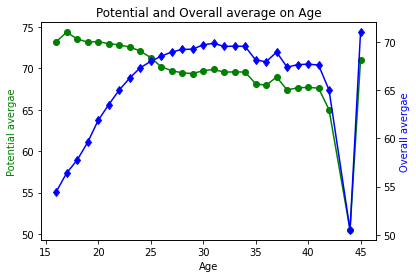

From the graph, the age when the players are fully released their potential is 44


In [ ]:
newdf1 = df.groupBy('Age').agg(F.mean('Potential')\
                                .alias('Potential avergae')).orderBy('Age').collect()
newdf1 = spark.createDataFrame(newdf1)
newdf2 = df.groupBy('Age').agg(F.mean('Overall')\
                                .alias('Overall avergae')).orderBy('Age').collect()
newdf2 = spark.createDataFrame(newdf2)
newdf1 = newdf1.toPandas()
newdf2 = newdf2.toPandas()
# Plotting the comparison
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.set_title('Potential and Overall average on Age')
ax1.set_xlabel('Age')
ax1.plot(newdf1['Age'], newdf1['Potential avergae'],'go-')
ax1.tick_params(axis='y')
ax1.set_ylabel('Potential avergae', color = 'g')
ax2 = ax1.twinx()
ax2.plot(newdf2['Age'], newdf2['Overall avergae'], 'bd-')
ax2.tick_params(axis='y')
ax2.set_ylabel('Overall avergae', color = 'b')
plt.show()
print('From the graph, the age when the players are fully released their potential is 44')

## **Part 2 Clustering**

In [ ]:
# Removing GK position from data
dfwithoutGK = df.where(df['Position'] != 'GK')
# Selecting relevent features
newAttributesDF = dfwithoutGK[['ID','Position', 'Height(CM)', 'Weight(KG)', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
                               'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina',
                               'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle',
                               'SlidingTackle']]

In [ ]:
DEF = ['LB','LWB','RB','LCB','RCB','CB','RWB']
FWD = ['RF','LF','LW','RS','RW','LS','CF','ST']
MID = ['LCM','LM','RDM','CAM','RAM','RCM','CM','CDM','RM','LAM','LDM']

In [ ]:
from pyspark.sql.functions import col, when
newAttributesDF = newAttributesDF.withColumn("Position_Group", newAttributesDF["Position"])

In [ ]:
newAttributesDF = newAttributesDF.withColumn("Position_Group",when(col("Position").isin(DEF), "DEF").otherwise(newAttributesDF.Position_Group))
newAttributesDF = newAttributesDF.withColumn("Position_Group",when(col("Position").isin(FWD), "FWD").otherwise(newAttributesDF.Position_Group))
newAttributesDF = newAttributesDF.withColumn("Position_Group",when(col("Position").isin(MID), "MID").otherwise(newAttributesDF.Position_Group))
df_kmeans_new = newAttributesDF
df_kmeans_new.show()

+------+--------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+--------------+
|    ID|Position|Height(CM)|Weight(KG)|Crossing|Finishing|HeadingAccuracy|ShortPassing|Volleys|Dribbling|Curve|FKAccuracy|LongPassing|BallControl|Acceleration|SprintSpeed|Agility|Reactions|Balance|ShotPower|Jumping|Stamina|Strength|LongShots|Aggression|Interceptions|Positioning|Vision|Penalties|Composure|Marking|StandingTackle|SlidingTackle|Position_Group|
+------+--------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+---

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler

FEATURES_COL = ['Height(CM)', 'Weight(KG)', 
                      'Crossing', 'Finishing', 'HeadingAccuracy', 
                      'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                      'FKAccuracy', 'LongPassing', 'BallControl', 
                      'Acceleration', 'SprintSpeed', 'Agility', 
                      'Reactions', 'Balance', 'ShotPower', 'Jumping', 
                      'Stamina', 'Strength', 'LongShots', 'Aggression', 
                      'Interceptions', 'Positioning', 'Vision', 'Penalties', 
                      'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']

vecAssembler = VectorAssembler(inputCols=FEATURES_COL, outputCol="features")
df_kmeans_new = vecAssembler.transform(df_kmeans_new).select('ID','features')

## **2.1**

In [ ]:
features = df_kmeans_new.select('features')
cost = np.zeros(20)
for k in range(2,20):
    kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol('features')
    model = kmeans.fit(df_kmeans_new)
    cost[k] = model.computeCost(df_kmeans_new)

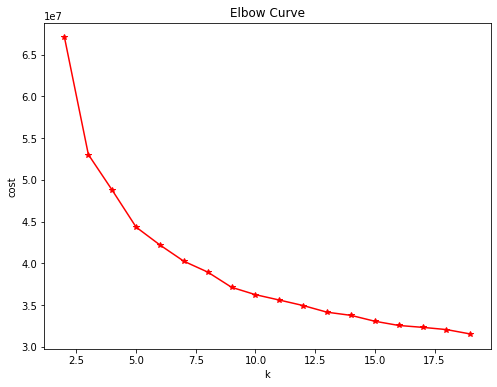

In [ ]:
k = np.arange(2,20)
ig, ax = plt.subplots(1,1, figsize =(8,6))
ax.set_xlabel('k')
ax.set_ylabel('cost')
ax.set_title('Elbow Curve')
ax.plot(k, cost[2:], 'r*-')
plt.show()

## **2.2 K-Means**

In [ ]:
k = 8
kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol('features')
model = kmeans.fit(df_kmeans_new)
predictions = model.transform(df_kmeans_new)

In [ ]:
predictions.show()

+------+--------------------+----------+
|    ID|            features|prediction|
+------+--------------------+----------+
|158023|[173.736,72.12112...|         2|
| 20801|[188.976,83.00733...|         2|
|190871|[179.832,68.0388,...|         2|
|192985|[155.7528,69.8531...|         4|
|183277|[176.784,73.93549...|         2|
|177003|[176.784,66.22443...|         4|
|176580|[182.88,86.18248,...|         2|
|155862|[182.88,82.100152...|         4|
|188545|[182.88,79.832192...|         2|
|182521|[182.88,76.203456...|         4|
|182493|[188.976,78.01782...|         0|
|168542|[176.784,67.13161...|         2|
|215914|[170.688,72.12112...|         4|
|211110|[155.448,74.84268...|         2|
|202126|[188.976,88.90403...|         2|
|194765|[179.832,73.02831...|         2|
|189511|[188.976,76.20345...|         4|
|179813|[185.928,77.11064...|         2|
|153079|[176.784,69.85316...|         2|
|138956|[188.976,84.82170...|         0|
+------+--------------------+----------+
only showing top

**ANSWER To : What you could find from those clusters (by cluster central point)?**

In [ ]:
print('Answer: There are total of 8 clusters with center point for all 31 features individually. These cluster centroids for each cluster is shown below: ')
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)
    print('\n')

Answer: There are total of 8 clusters with center point for all 31 features individually. These cluster centroids for each cluster is shown below: 
Cluster Centers: 
[177.3317464   76.31794486  58.41639945  44.02061383  62.79111315
  67.3220339   42.5387082   61.02611086  52.17911131  46.79294549
  63.5510765   65.5758131   65.25240495  66.06596427  64.62757673
  66.20568026  64.10581768  62.28263857  70.52038479  73.82638571
  72.67384333  52.59688502  71.43426477  67.65048099  53.27072836
  57.47457627  48.97938617  64.57627119  66.67155291  68.96472744
  66.88914338]


[187.68026262  81.70680941  39.8684377   30.21252372  68.72675522
  59.71600253  31.19354839  44.54332701  34.72485769  33.42631246
  54.99114485  55.46110057  53.19481341  55.6059456   50.15876028
  62.97975965  50.6116382   51.14231499  68.34977862  64.29095509
  79.52941176  34.24351676  70.56799494  67.06388362  33.600253
  41.73561037  41.05566097  61.12903226  67.29411765  69.6116382
  66.76533839]


[172.466175

In [ ]:
print('DEF position count : {}'.format(newAttributesDF.where(newAttributesDF.Position_Group.like('%DEF%')).count()))
print('FWD position count : {}'.format(newAttributesDF.where(newAttributesDF.Position_Group.like('%FWD%')).count()))
print('MID position count : {}'.format(newAttributesDF.where(newAttributesDF.Position_Group.like('%MID%')).count()))

DEF position count : 5866
FWD position count : 3418
MID position count : 6838


In [ ]:
print('Cluster 1 prediction points : {}'.format(predictions.where(predictions.prediction.like('0')).count()))
print('Cluster 2 prediction points : {}'.format(predictions.where(predictions.prediction.like('1')).count()))
print('Cluster 3 prediction points : {}'.format(predictions.where(predictions.prediction.like('2')).count()))
print('Cluster 4 prediction points : {}'.format(predictions.where(predictions.prediction.like('3')).count()))
print('Cluster 5 prediction points : {}'.format(predictions.where(predictions.prediction.like('4')).count()))
print('Cluster 6 prediction points : {}'.format(predictions.where(predictions.prediction.like('5')).count()))
print('Cluster 7 prediction points : {}'.format(predictions.where(predictions.prediction.like('6')).count()))
print('Cluster 8 prediction points : {}'.format(predictions.where(predictions.prediction.like('7')).count()))

Cluster 1 prediction points : 2208
Cluster 2 prediction points : 1581
Cluster 3 prediction points : 2311
Cluster 4 prediction points : 1344
Cluster 5 prediction points : 2390
Cluster 6 prediction points : 2029
Cluster 7 prediction points : 1783
Cluster 8 prediction points : 2476


In [ ]:
# Joining the two dataframes
temp1 = newAttributesDF.alias('temp1')
temp2 = predictions.alias('temp2')
df_kmeans_pred_ = temp1.join(temp2, temp1.ID == temp2.ID)
df_kmeans_pred_ = df_kmeans_pred_.drop(*['features'])
df_kmeans_pred_ = df_kmeans_pred_.withColumnRenamed("prediction","Cluster")
df_kmeans_pred_.show()

+------+--------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+--------------+------+-------+
|    ID|Position|Height(CM)|Weight(KG)|Crossing|Finishing|HeadingAccuracy|ShortPassing|Volleys|Dribbling|Curve|FKAccuracy|LongPassing|BallControl|Acceleration|SprintSpeed|Agility|Reactions|Balance|ShotPower|Jumping|Stamina|Strength|LongShots|Aggression|Interceptions|Positioning|Vision|Penalties|Composure|Marking|StandingTackle|SlidingTackle|Position_Group|    ID|Cluster|
+------+--------+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------

In [ ]:
df_kmeans_pred_.groupBy("Position_Group", 'Cluster').agg(F.count('Cluster')\
                                          .alias('datapoints in cluster')).orderBy('datapoints in cluster', ascending=False).show()

+--------------+-------+---------------------+
|Position_Group|Cluster|datapoints in cluster|
+--------------+-------+---------------------+
|           MID|      4|                 1720|
|           FWD|      6|                 1648|
|           MID|      5|                 1486|
|           DEF|      1|                 1462|
|           DEF|      7|                 1297|
|           DEF|      3|                 1266|
|           DEF|      0|                 1230|
|           MID|      2|                 1195|
|           MID|      7|                 1141|
|           FWD|      2|                 1112|
|           MID|      0|                  967|
|           DEF|      4|                  599|
|           FWD|      5|                  535|
|           MID|      6|                  135|
|           MID|      1|                  117|
|           MID|      3|                   77|
|           FWD|      4|                   71|
|           FWD|      7|                   38|
|           F

## **Part 3 Classification**

In [ ]:
FEATURES_COL_ = ['Height(CM)', 'Weight(KG)', 
                      'Crossing', 'Finishing', 'HeadingAccuracy', 
                      'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                      'FKAccuracy', 'LongPassing', 'BallControl', 
                      'Acceleration', 'SprintSpeed', 'Agility', 
                      'Reactions', 'Balance', 'ShotPower', 'Jumping', 
                      'Stamina', 'Strength', 'LongShots', 'Aggression', 
                      'Interceptions', 'Positioning', 'Vision', 'Penalties', 
                      'Composure', 'Marking', 'StandingTackle', 'SlidingTackle','Cluster']


vecAssembler_ = VectorAssembler(inputCols=FEATURES_COL_, outputCol="features")
df_class_ = vecAssembler_.transform(df_kmeans_pred_).select('features','Position_Group')
df_class_.show(3)

+--------------------+--------------+
|            features|Position_Group|
+--------------------+--------------+
|[173.736,72.12112...|           FWD|
|[188.976,83.00733...|           FWD|
|[179.832,68.0388,...|           FWD|
+--------------------+--------------+
only showing top 3 rows



In [ ]:
from pyspark.ml.feature import StandardScaler

standardscaler=StandardScaler().setInputCol("features").setOutputCol("Scaled_features")
raw_data=standardscaler.fit(df_class_).transform(df_class_)
raw_data.select("features","Scaled_features",'Position_Group').show(5)

+--------------------+--------------------+--------------+
|            features|     Scaled_features|Position_Group|
+--------------------+--------------------+--------------+
|[173.736,72.12112...|[12.9261363965246...|           FWD|
|[188.976,83.00733...|[14.0600080102548...|           FWD|
|[179.832,68.0388,...|[13.3796850420167...|           FWD|
|[155.7528,69.8531...|[11.5881678923229...|           MID|
|[176.784,73.93549...|[13.1529107192706...|           FWD|
+--------------------+--------------------+--------------+
only showing top 5 rows



In [ ]:
raw_data_ = raw_data.withColumn('Target',when(col("Position_Group") == "DEF", 1)
      .when(col("Position_Group")== "FWD", 0)
      .otherwise(2))
raw_data_.show()

+--------------------+--------------+--------------------+------+
|            features|Position_Group|     Scaled_features|Target|
+--------------------+--------------+--------------------+------+
|[173.736,72.12112...|           FWD|[12.9261363965246...|     0|
|[188.976,83.00733...|           FWD|[14.0600080102548...|     0|
|[179.832,68.0388,...|           FWD|[13.3796850420167...|     0|
|[155.7528,69.8531...|           MID|[11.5881678923229...|     2|
|[176.784,73.93549...|           FWD|[13.1529107192706...|     0|
|[176.784,66.22443...|           MID|[13.1529107192706...|     2|
|[182.88,86.18248,...|           FWD|[13.6064593647627...|     0|
|[182.88,82.100152...|           DEF|[13.6064593647627...|     1|
|[182.88,79.832192...|           FWD|[13.6064593647627...|     0|
|[182.88,76.203456...|           MID|[13.6064593647627...|     2|
|[188.976,78.01782...|           DEF|[14.0600080102548...|     1|
|[176.784,67.13161...|           MID|[13.1529107192706...|     2|
|[170.688,

In [ ]:
train, test = raw_data_.randomSplit([0.7, 0.3], seed=12)
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(labelCol="Target", featuresCol="Scaled_features",maxIter=10)
model=lr.fit(train)

predict_train=model.transform(train)
predict_test=model.transform(test)
predict_test.select("Target","prediction").show(10)

+------+----------+
|Target|prediction|
+------+----------+
|     2|       2.0|
|     2|       2.0|
|     0|       2.0|
|     2|       2.0|
|     2|       2.0|
|     2|       2.0|
|     2|       2.0|
|     1|       2.0|
|     0|       0.0|
|     2|       2.0|
+------+----------+
only showing top 10 rows



In [ ]:
targets = predict_test.select('Target').collect()
predicts = predict_test.select('prediction').collect()

## **3.2**

In [ ]:
from sklearn.metrics import confusion_matrix
results = confusion_matrix(targets, predicts)
print('Confusion Matrix: ')
print(results)

Confusion Matrix: 
[[ 834    5  178]
 [   2 1422  293]
 [ 225  238 1619]]


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(targets, predicts)
print('The Precision, Recall and F1 score:')
print(report)

The Precision, Recall and F1 score:
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1017
           1       0.85      0.83      0.84      1717
           2       0.77      0.78      0.78      2082

    accuracy                           0.80      4816
   macro avg       0.80      0.81      0.81      4816
weighted avg       0.81      0.80      0.80      4816



## **3.3**

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

In [ ]:
raw_data_.show()

+--------------------+--------------+--------------------+------+
|            features|Position_Group|     Scaled_features|Target|
+--------------------+--------------+--------------------+------+
|[173.736,72.12112...|           FWD|[12.9261363965246...|     0|
|[188.976,83.00733...|           FWD|[14.0600080102548...|     0|
|[179.832,68.0388,...|           FWD|[13.3796850420167...|     0|
|[155.7528,69.8531...|           MID|[11.5881678923229...|     2|
|[176.784,73.93549...|           FWD|[13.1529107192706...|     0|
|[176.784,66.22443...|           MID|[13.1529107192706...|     2|
|[182.88,86.18248,...|           FWD|[13.6064593647627...|     0|
|[182.88,82.100152...|           DEF|[13.6064593647627...|     1|
|[182.88,79.832192...|           FWD|[13.6064593647627...|     0|
|[182.88,76.203456...|           MID|[13.6064593647627...|     2|
|[188.976,78.01782...|           DEF|[14.0600080102548...|     1|
|[176.784,67.13161...|           MID|[13.1529107192706...|     2|
|[170.688,

**Random Forrest Classifier**

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Fit on whole dataset to include all labels in index.
labelIndexer = StringIndexer(inputCol="Target", outputCol="indexedLabel").fit(raw_data_)

# Set maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedLabel", maxCategories=4).fit(raw_data_)

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = raw_data_.randomSplit([0.7, 0.3])

# Train a RandomForest model.
rf = RandomForestClassifier(labelCol="Target", featuresCol="indexedLabel", numTrees=10)

# Convert indexed labels back to original labels.
labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel",
                               labels=labelIndexer.labels)

# Chain indexers and forest in a Pipeline
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, rf, labelConverter])

# Train model.  This also runs the indexers.
model = pipeline.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("predictedLabel", "Target", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="Target", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = {}".format(1.0 - accuracy))

rfModel = model.stages[2]
print('Model Summary : {}'.format(rfModel))

+--------------+------+--------------------+
|predictedLabel|Target|            features|
+--------------+------+--------------------+
|             0|     2|[155.448,57.15259...|
|             1|     1|[155.448,59.87414...|
|             1|     1|[155.448,60.78132...|
|             1|     1|[155.448,62.14210...|
|             1|     1|[155.448,62.14210...|
+--------------+------+--------------------+
only showing top 5 rows

Test Error = 0.18105564648117844
Model Summary : RandomForestClassificationModel (uid=RandomForestClassifier_e99860b5430d) with 10 trees


**Logistic Regression Classifier**

In [ ]:
from pyspark.ml.classification import LogisticRegression

# Fit on whole dataset to include all labels in index.
labelIndexer = StringIndexer(inputCol="Target", outputCol="indexedLabel").fit(raw_data_)

# Set maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedLabel", maxCategories=4).fit(raw_data_)

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = raw_data_.randomSplit([0.7, 0.3])

# Train a Logistic Regression model.
lr = LogisticRegression(labelCol="Target", featuresCol="indexedLabel", maxIter=10, regParam=0.3, elasticNetParam=0.8)

# Convert indexed labels back to original labels.
labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel",
                               labels=labelIndexer.labels)

# Chain indexers and forest in a Pipeline
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, lr, labelConverter])

# Train model.  This also runs the indexers.
model = pipeline.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("predictedLabel", "Target", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="Target", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = {}".format(1.0 - accuracy))

rfModel = model.stages[2]
print('Model Summary : {}'.format(rfModel))

+--------------+------+--------------------+
|predictedLabel|Target|            features|
+--------------+------+--------------------+
|             0|     2|[155.448,57.15259...|
|             0|     2|[155.448,59.87414...|
|             1|     1|[155.448,60.78132...|
|             0|     2|[155.448,62.14210...|
|             0|     2|[155.448,62.14210...|
+--------------+------+--------------------+
only showing top 5 rows

Test Error = 0.3446791060077917
Model Summary : LogisticRegressionModel: uid = LogisticRegression_00ba33c72c21, numClasses = 3, numFeatures = 32


**Decision Tree Classifier**

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier

# Fit on whole dataset to include all labels in index.
labelIndexer = StringIndexer(inputCol="Target", outputCol="indexedLabel").fit(raw_data_)

# Set maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedLabel", maxCategories=4).fit(raw_data_)

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = raw_data_.randomSplit([0.7, 0.3])

# Train a Decision Tree model.
dt = DecisionTreeClassifier(labelCol="Target", featuresCol="indexedLabel", maxDepth = 3)
# Convert indexed labels back to original labels.
labelConverter = IndexToString(inputCol="prediction", outputCol="predictedLabel",
                               labels=labelIndexer.labels)

# Chain indexers and forest in a Pipeline
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, dt, labelConverter])

# Train model.  This also runs the indexers.
model = pipeline.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("predictedLabel", "Target", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="Target", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = {}".format(1.0 - accuracy))

rfModel = model.stages[2]
print('Model Summary : {}'.format(rfModel))

+--------------+------+--------------------+
|predictedLabel|Target|            features|
+--------------+------+--------------------+
|             1|     1|[155.448,59.87414...|
|             0|     2|[155.448,59.87414...|
|             1|     2|[155.448,62.14210...|
|             0|     2|[155.448,62.14210...|
|             1|     1|[155.448,62.14210...|
+--------------+------+--------------------+
only showing top 5 rows

Test Error = 0.248181083265966
Model Summary : DecisionTreeClassificationModel (uid=DecisionTreeClassifier_53a8c339e3af) of depth 3 with 11 nodes


# THE END